# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: int
- `Glucose`: int
- `BloodPressure`: int 
- `SkinThickness`: int
- `Insulin`: int
- `BMI`: float
- `DiabetesPedigreeFunction`: float 
- `Age`: int
- `Outcome`: bool

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [1]:
import pandas as pd
import numpy as np

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21   

3. How many columns (features) does the data contain?

In [2]:
print(f'Columns: {diabetes_data.shape[1]}')

Columns: 9


4. How many rows (observations) does the data contain?

In [3]:
print(f'Rows: {diabetes_data.shape[0]}')


Rows: 768


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [4]:
diabetes_data.info()
print('\nBased ONLY on .info()-method it seems that there is no missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB

Based ONLY on .info()-method it seems that there is no missing values.


6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [5]:
print(diabetes_data.describe(include='all'))


        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
unique          NaN         NaN            NaN            NaN         NaN   
top             NaN         NaN            NaN            NaN         NaN   
freq            NaN         NaN            NaN            NaN         NaN   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age Outcome  
count   

7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**:

- Minimiarvot ovat nollia, mikä ei käytännössä ole elävällä ihmisellä mahdollisia

8. Do you spot any other outliers in the data?

**Your response to question 8**:

- Myös monet maksimiarvot poikkeavat merkittävästi keskiarvosta / mediaanista

- Outcome-sarakkeessa on käytetty puuttuvana arvona 'o', mistä johtuen sarakkeen tietotyyppi on object. Käsittely alla.


In [6]:
outcome_uniques = diabetes_data['Outcome'].unique()
print(outcome_uniques)
wrong = outcome_uniques[2]
print(wrong)


['1' '0' 'O']
O


In [7]:
diabetes_data['Outcome'].replace(wrong, np.nan, inplace=True)
print(diabetes_data['Outcome'].unique())

['1' '0' nan]


9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [8]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)


10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [9]:
diabetes_data.info()
print()
count_nans = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].isna().sum()
print(count_nans)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   762 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [10]:
nan_rows = diabetes_data[diabetes_data.isnull().any(axis=1)]
print(nan_rows.head(20))


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
5             5    116.0           74.0            NaN      NaN  25.6   
7            10    115.0            NaN            NaN      NaN  35.3   
9             8    125.0           96.0            NaN      NaN   NaN   
10            4    110.0           92.0            NaN      NaN  37.6   
11           10    168.0           74.0            NaN      NaN  38.0   
12           10    139.0           80.0            NaN      NaN  27.1   
15            7    100.0            NaN            NaN      NaN  30.0   
17            7    107.0           74.0            NaN      NaN  29.6   
21            8     99.0           84.0            NaN      NaN  35.4   
22            7    196.0           90.0            

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**:

- Useilla riveilla arvoja puuttuu useammastakin sarakkeesta -> jos puuttuu jostain muusta, niin yleensä aina puuttuu myös insulin-sarakkeesta

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [11]:
diabetes_data.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   762 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB



14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [12]:
print(diabetes_data['Outcome'].unique())

['1' '0' nan]


15. How might you resolve this issue?

In [13]:
diabetes_data['Outcome'].fillna('-1', inplace=True)
print()
print(diabetes_data['Outcome'].unique())
print()
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('float64')
print(diabetes_data['Outcome'].unique())
print()
diabetes_data['Outcome'].replace(-1, np.nan, inplace=True)
print(diabetes_data['Outcome'].unique())
print()
print(diabetes_data.info())



['1' '0' '-1']

[ 1.  0. -1.]

[ 1.  0. nan]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   762 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
None


In [14]:
print(diabetes_data['Outcome'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype  
--------------  -----  
762 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


**Your response to question 15**:

Ratkaisu toteutettu yllä, eli:

1.) 'O'-puuttuvat arvot muutettu np.nan-arvoiksi jo kohdassa 8

2.) Muutettu nan-arvot muotoon '-1'

3.) Muutettu sarake float64-muotoon

4.) Muutettu -1 -arvot muotoon np.nan

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [15]:
for column in diabetes_data:
    counts = diabetes_data[column].value_counts()
    print(counts)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 135, dtype: int64
70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
98.0      3
100.0     3
106.0     3
110.0     3
55.0      2
30.0      2
104.0     2
46.0      2
108.0     2
61.0      1
38.0      1
24.0      1
122.0     1
102.0     1
95.0      1
40.0      1
114.0     1
Name: BloodPressure, dtype: int64
32.0    31
30.0    27
27.0    23
23.0  

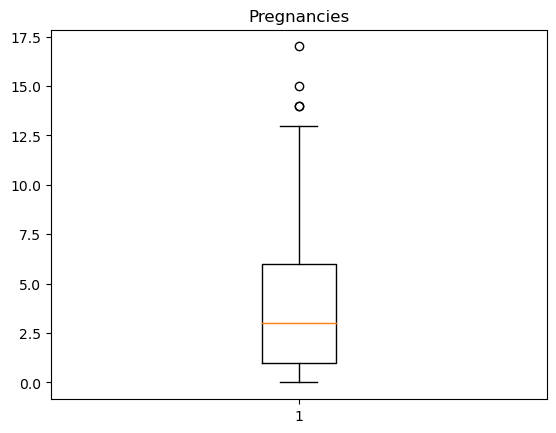

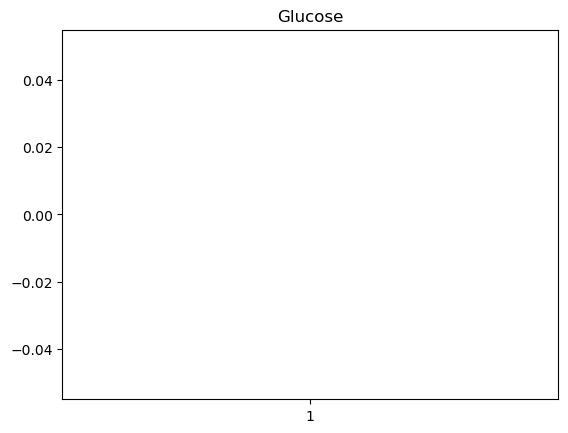

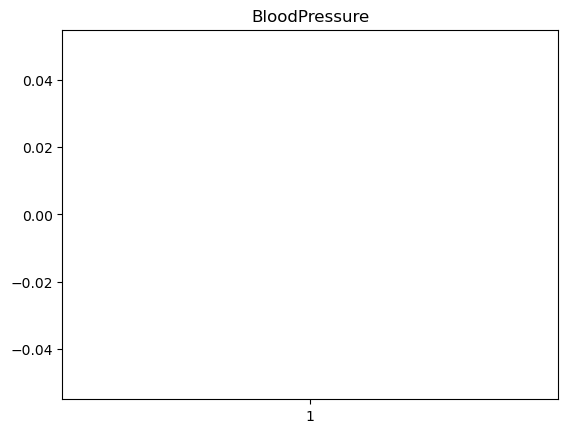

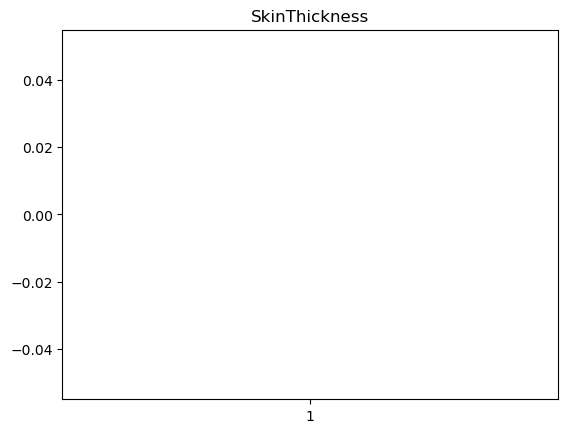

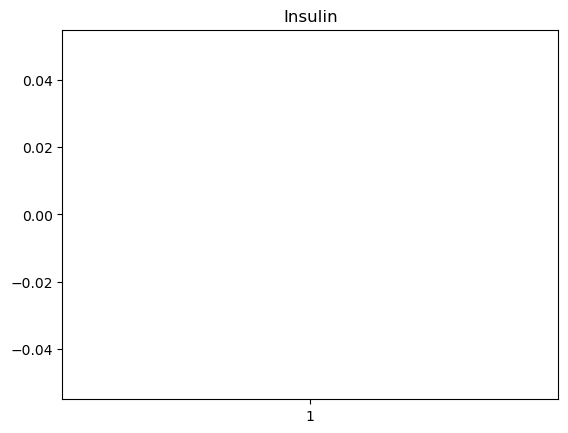

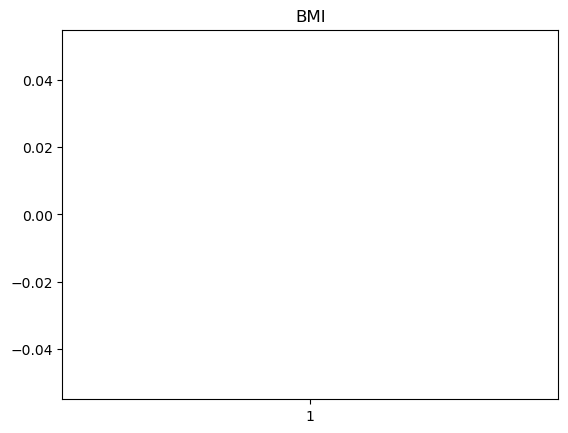

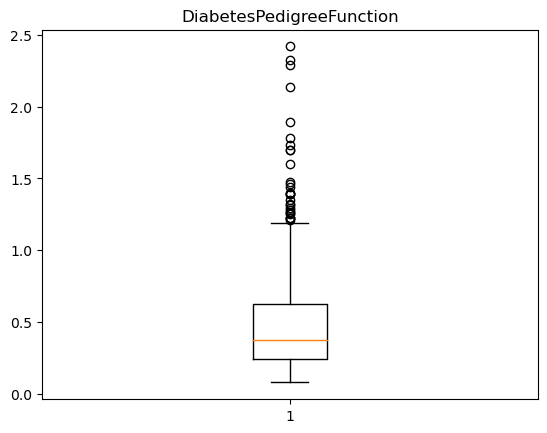

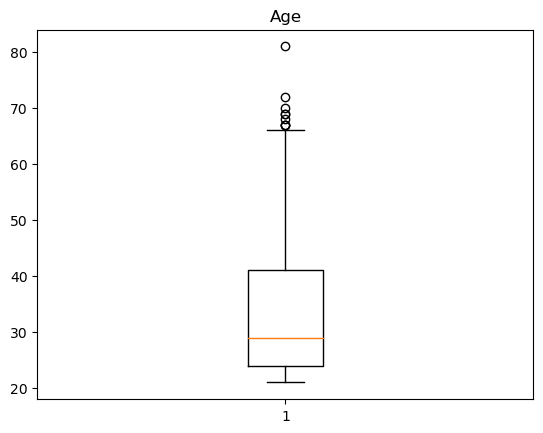

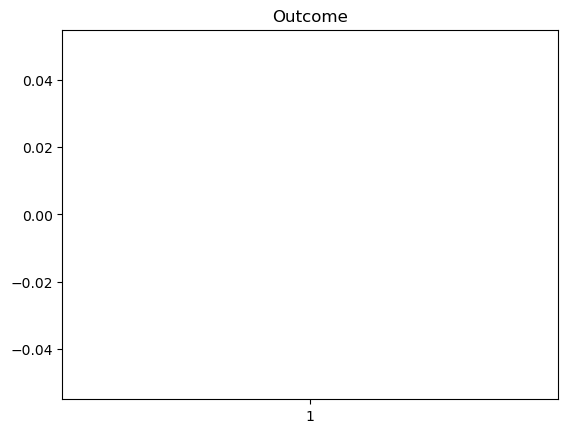

In [16]:
import matplotlib.pyplot as plt

for column in diabetes_data:
    plt.figure() 
    plt.boxplot(diabetes_data[column]) 
    plt.title(column) 
    plt.show() 

In [17]:
print(diabetes_data.isna().sum())

for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = diabetes_data[column].median()
    diabetes_data[column].fillna(median_value, inplace=True)
    
print()
print(diabetes_data.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       6
dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     6
dtype: int64
